In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data.xlsx')
# https://www.kaggle.com/datasets/felixgauthamt/e-commerce-regression-data-set/data

In [3]:
df.drop(columns=['Aging', 'Segment', 'City', 'State', 'Region'], inplace=True)
df.rename(columns={'Sales': 'Price', 'Product Category': 'Category', 'Months': 'Month'}, inplace=True)

# let's assume that shimpnets are free for customers and shipping cost is paid by seller
# bulk is the producent price per 1 piece
df['Total'] = df['Price'] * df['Quantity'] * (1 - df['Discount'])
df['Bulk'] = (df['Total'] - df['Profit'] - df['Shipping Cost']) / df['Quantity']
df['Month'] = df['Order Date'].dt.month_name()

## Items sold by month & total revenue

In [4]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
products = df[['Month', 'Quantity', 'Total', 'Profit']].groupby('Month').sum()
products = products.reindex(months)
products

,Quantity,Total,Profit
Month,,,
January,12985,1948586.07,313566.346667
February,11501,1752765.36,286102.623333
March,13349,2017503.63,317186.006667
April,12314,1891718.03,308364.513333
May,12854,1950845.64,313751.246667
June,12851,1971560.27,307585.023333
July,13277,1985015.34,318703.200000
August,13122,1989097.30,310442.843333
September,12568,1910845.98,305334.456667


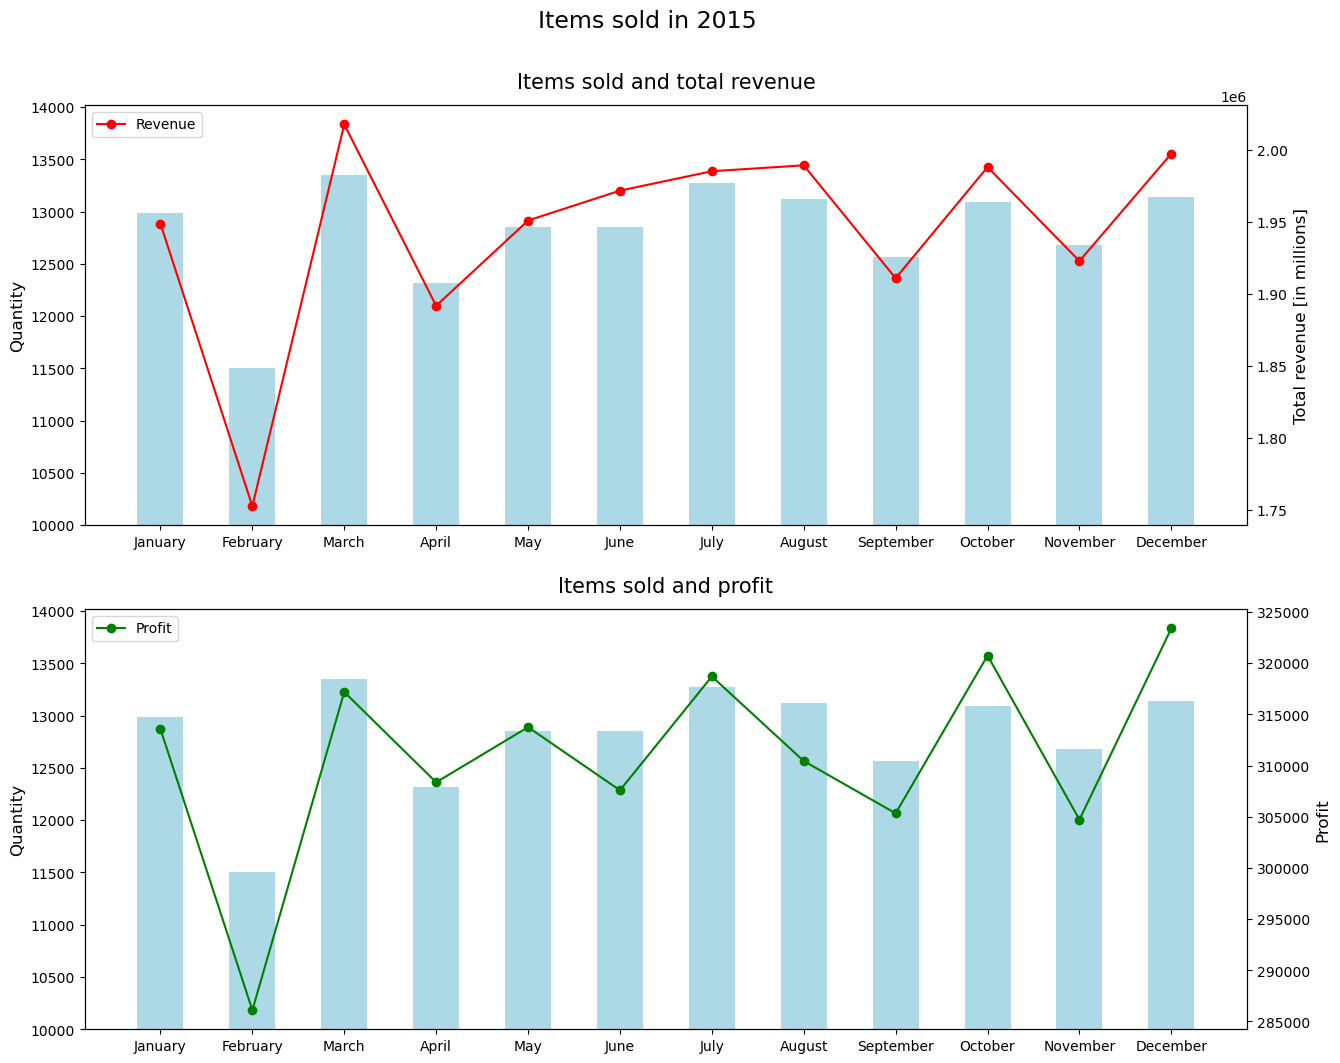

In [5]:
fig, (ax1, ax3) = plt.subplots(2, figsize=(15, 12))
fig.suptitle('Items sold in 2015', y=.96, size=17)

ax1.set_title('Items sold and total revenue', y=1.02, size=15)
ax1.bar(products.index, products['Quantity'], color='lightblue', width=.5)
ax1.set_ylim(10000)
ax1.set_ylabel('Quantity', size=12)

ax2 = ax1.twinx()
ax2.plot(products['Total'], color='red', marker='o')
ax2.set_ylabel('Total revenue [in millions]', size=12)
ax2.legend(['Revenue'], loc='upper left')

ax3.set_title('Items sold and profit', y=1.02, size=15)
ax3.bar(products.index, products['Quantity'], color='lightblue', width=.5)
ax3.set_ylim(10000)
ax3.set_ylabel('Quantity', size=12)

ax4 = ax3.twinx()
ax4.plot(products['Profit'], color='green', marker='o')
ax4.set_ylabel('Profit', size=12)
ax4.legend(['Profit'], loc='upper left')

plt.show()

## Top categories

In [6]:
categories = df[['Category', 'Quantity', 'Total']].groupby(by='Category').sum().sort_values(by='Quantity', ascending=False)
categories['Total'] = (round(categories['Total'] / 1_000_000, 2)).astype('str') + ' million'
categories

,Quantity,Total
Category,,
Fashion,92071,15.13 million
Home & Furniture,31055,3.86 million
Auto & Accessories,22395,3.18 million
Electronic,8211,1.16 million


## Best selling product in each month

In [7]:
p = df.groupby(['Month', 'Product'])[['Quantity', 'Total']].sum()
products = p.loc[p['Quantity'] == p.groupby(by='Month')['Quantity'].transform('max')]
products.reset_index(1, inplace=True)
products = products.reindex(months)
products

,Product,Quantity,Total
Month,,,
January,Sneakers,816,48958.92
February,Titak watch,731,161667.96
March,Jeans,771,163155.56
April,Titak watch,753,166469.64
May,Shirts,757,143989.44
June,Jeans,744,157001.42
July,Casula Shoes,857,101501.56
August,T - Shirts,767,184819.52
September,Fossil Watch,762,117720.42


## Top countries

In [8]:
countries = df[['Country', 'Quantity', 'Total']].groupby('Country').sum().sort_values(by=['Quantity', 'Total'], ascending=[False, False]).head(10)
countries

,Quantity,Total
Country,,
United States,30024,4562388.31
Australia,8518,1288079.77
France,8379,1259817.47
Mexico,8018,1227478.61
Germany,6155,938607.35
China,5705,871972.65
United Kingdom,4871,737133.41
Brazil,4791,717546.79
India,4631,704143.18


## Ship date vs Order date

In [9]:
df['Delay'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Delay'].value_counts().sort_index()

Delay
0     2701
1     4766
2     4815
3     5017
4     4875
5     4939
6     4892
7     4900
8     4820
9     4674
10    4891
Name: count, dtype: int64

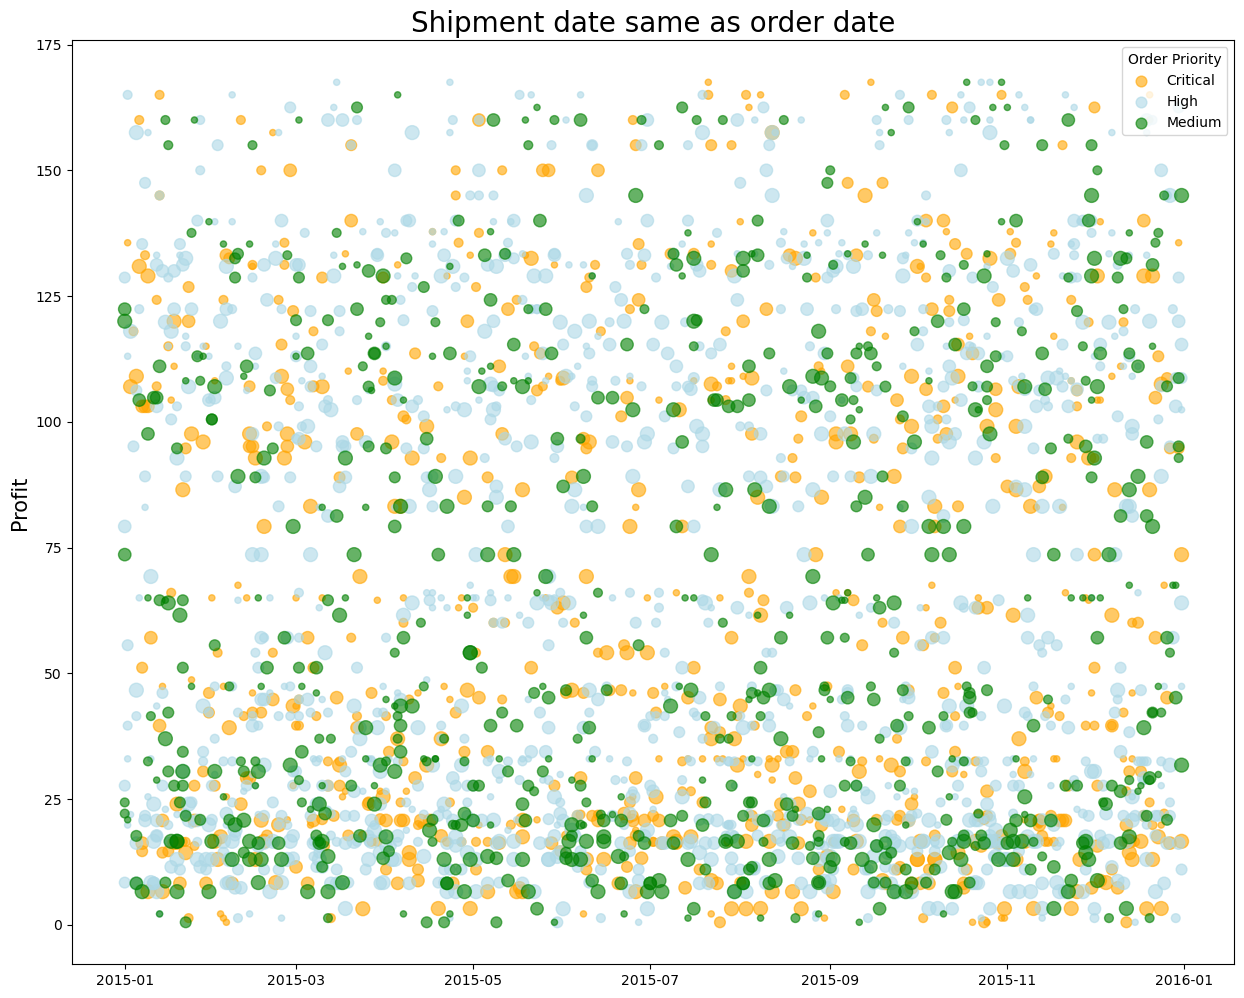

In [10]:
same_day = df[['Order Date', 'Order Priority', 'Profit', 'Quantity']].loc[df['Delay'] == 0]
fig, ax = plt.subplots(figsize=(15, 12))
colors = ['orange', 'lightblue', 'green']

for i, op in enumerate(same_day['Order Priority'].unique()):
    sub_df = same_day.loc[same_day['Order Priority'] == op]
    ax.scatter(sub_df['Order Date'], sub_df['Profit'], color=colors[i], s=sub_df['Quantity']*20, alpha=.6)
ax.legend(same_day['Order Priority'].unique(), loc='upper right', title='Order Priority')
ax.set_ylabel('Profit', size=15)
plt.title('Shipment date same as order date', size=20)

plt.show()